<a href="https://colab.research.google.com/github/rishuptdr/nyc-project/blob/main/Team_NYC_Taxi_Trip_Time_Prediction_Capstone_Project_RV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### our task is to build a model that predicts the total ride duration of taxi trips in New York City. 

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import pandas as pd       #data processing
import numpy as np        #linear algebra

In [ ]:
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')


In [ ]:
#some more 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from scipy.interpolate import interp1d

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.5 MB/s 
     |████████████████████████████████| 6.3 MB 51.9 MB/s 
     |████████████████████████████████| 16.7 MB 40.5 MB/s 


#Import relevent data

In [ ]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path= "/content/drive/MyDrive/NYC Taxi Trip Time Prediction /Copy of NYC Taxi Data.csv"
df= pd.read_csv(file_path)

In [ ]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


##To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values in this dataset which saves us a step of imputing.

###Let us check for unique values of all columns.

In [ ]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

We see that id has 1458644 unique values which are equal to the number of rows in our dataset.
There are 2 unique vendor ids.
There are 10 unique passenger counts.
There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

In [ ]:
df.shape


(1458644, 11)

We see the shape of the dataset is (1458644, 11) which essentially means that there are 1458644 rows and 11 columns in the dataset.

Now let’s see what are those 11 columns.

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
vendor_id, passenger_count, and trip_duration are of type int.
pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.

###Let us finally check for a statistical summary of our dataset.
Note that this function can provide statistics for numerical features only.

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


###Some insights from the above summary:

Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

The minimum trip duration is also quite low. We will come back to this later during Univariate Analysis.

##Independent Variables
id — a unique identifier for each trip

vendor_id — a code indicating the provider associated with the trip record

pickup_datetime — date and time when the meter was engaged

dropoff_datetime — date and time when the meter was disengaged

passenger_count — the number of passengers in the vehicle (driver entered value)

pickup_longitude — the longitude where the meter was engaged

pickup_latitude — the latitude where the meter was engaged

dropoff_longitude — the longitude where the meter was disengaged

dropoff_latitude — the latitude where the meter was disengaged

store_and_fwd_flag — This flag indicates whether the trip 
record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.

##Target Variable

trip_duration — duration of the trip in seconds

##Feature Creation
Let us create some new features from the existing variables so that we can gain more insights from the data.

Remember pickup_datetime and dropoff_datetime were both of type object.
If we want to make use of this data, we can convert it to datetime object which contains numerous functions with which we can create new features that we will see soon.

We can convert it to datetime using the following code.

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

Now, let us extract and create new features from this datetime features we just created.



In [ ]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [ ]:
df['vendor_id']

0          2
1          1
2          2
3          2
4          2
          ..
1458639    2
1458640    1
1458641    2
1458642    1
1458643    1
Name: vendor_id, Length: 1458644, dtype: int64

##We have created the following features:

pickup_day and dropoff_day which will contain the name of the 
day on which the ride was taken.

pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.

pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.

pickup_month and dropoff_month with month number with January=1 and December=12.




Next, I  defined a function that lets us determine what time of the day the ride was taken. I created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

Also saw during dataset exploration that coordinates in the form of longitude and latitude for pickup and dropoff. But, i can’t really gather any insights or draw conclusions from that.
So, the most obvious feature that i can extract from this is distance. Let us do that.

Importing the library which lets us calculate distance from geographical coordinates.

In [ ]:
from geopy.distance import great_circle

In [ ]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,1,1,11,12,1,1,Morning,Afternoon,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,2,2,19,19,4,4,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,1.188590


##Univariate Analysis
The univariate analysis involves studying patterns of all variables individually.

###Target Variable
Let us start by analyzing the target variable.



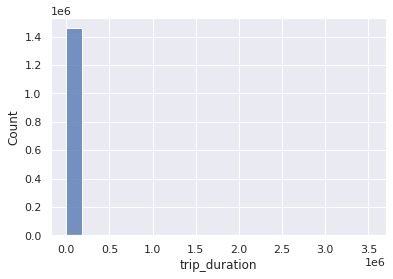

In [ ]:
sns.histplot(df['trip_duration'],kde=False,bins=20)

The histogram is really skewed as we can see.

also look at the boxplot.

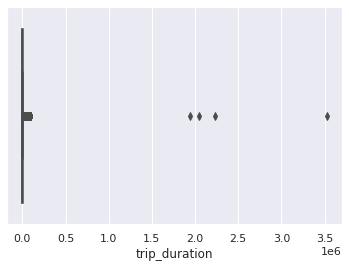

In [ ]:
sns.boxplot(df['trip_duration'])

clearly see an outlier.

In [ ]:
df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

see that there is an entry which is significantly different from others.

As there is a single row only, let us drop this row

In [ ]:
df.drop(df[df['trip_duration'] == 3526282].index, inplace = True)

##Vendor id

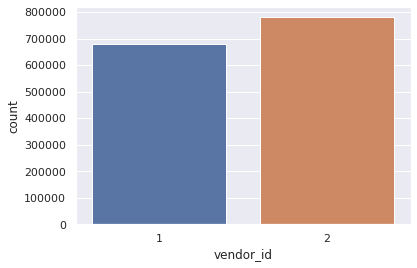

In [ ]:
sns.countplot(x='vendor_id',data=df)

see that there is not much difference between the trips taken by both vendors.

##Passenger Count

In [ ]:
df.passenger_count.value_counts()

1    1033539
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

There are some trips with even 0 passenger count.
There is only 1 trip each for 8 and 9 passengers.

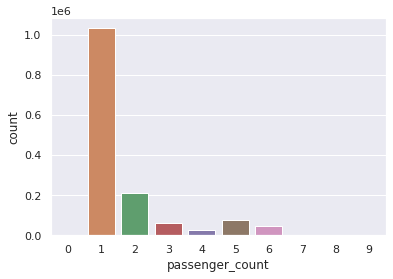

In [ ]:
sns.countplot(x='passenger_count',data=df)

see the highest amount of trips are with 1 passenger.

Let us remove the rows which have 0 or 7 or 9 passenger count.

In [ ]:
data=df[df['passenger_count']!=0]
data=df[df['passenger_count']<=6]

In [ ]:
data.passenger_count.value_counts()

1    1033539
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
Name: passenger_count, dtype: int64

Now, that seems like a fair distribution.

##Store and Forward Flag





In [ ]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994485
Y    0.005515
Name: store_and_fwd_flag, dtype: float64

there are less than 1% of trips that were stored before forwarding.

##Distance


In [ ]:
df['distance'].value_counts()

0.000000    5897
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
2.917715       1
4.698058       1
4.920641       1
2.988820       1
1.134044       1
Name: distance, Length: 1452359, dtype: int64

there are 5897 trips with 0 km distance.

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.

The driver deliberately took this ride to complete a target ride number.

The passengers canceled the trip.

analyze these trips further in bivariate analysis.

##Trips per Day

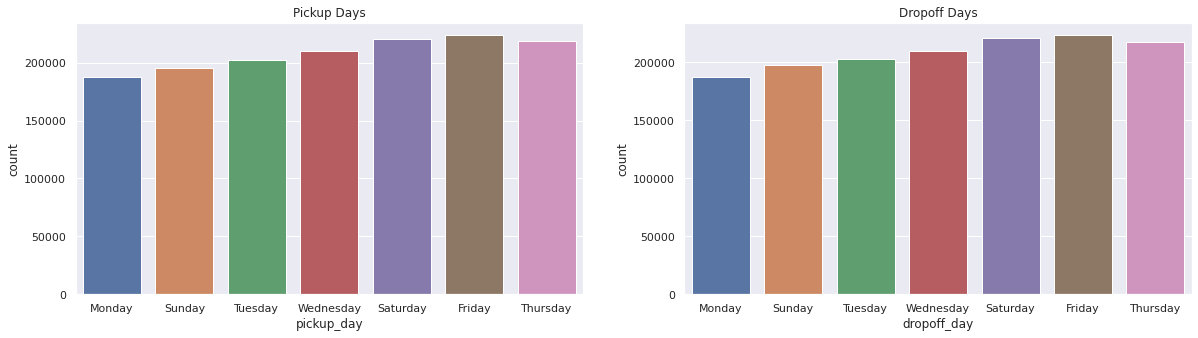

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.

##Trips per Hour

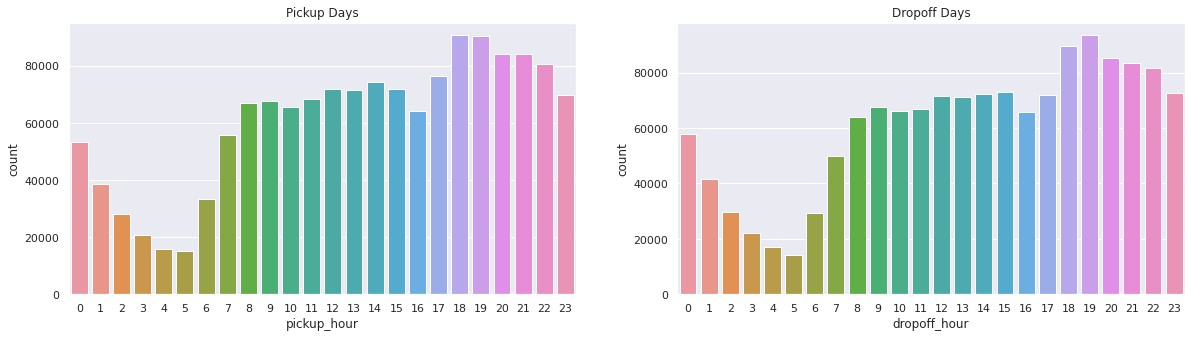

In [ ]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

##Trips per Time of Day

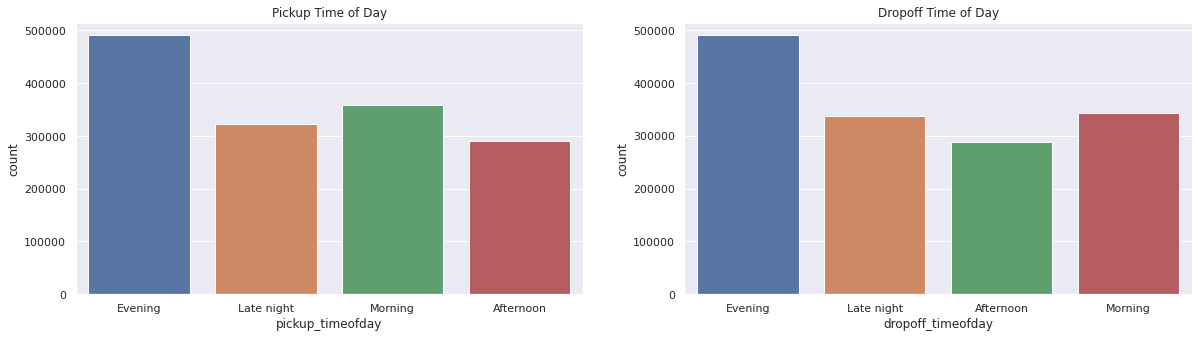

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

As we saw above, evenings are the busiest.

##Trips per month

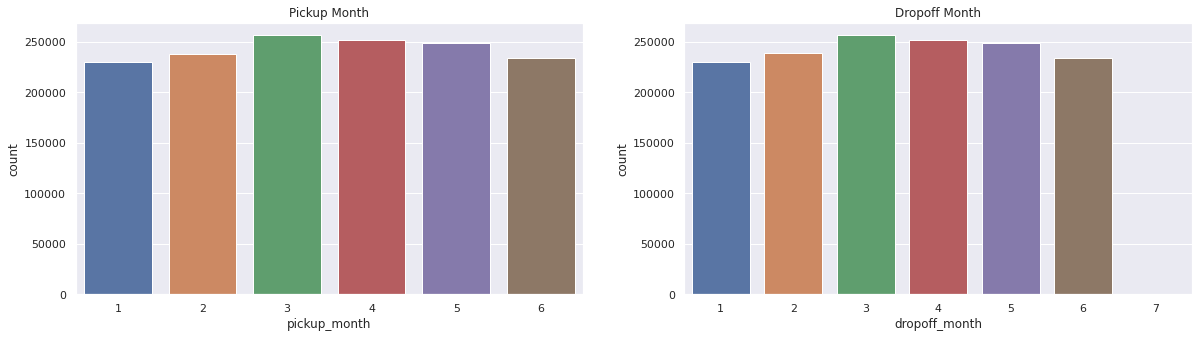

In [ ]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax12)

There is not much difference in the number of trips across months.

 

Now, we will analyze all these variables further in bivariate analysis.

##Bivariate Analysis
Bivariate Analysis involves finding relationships, patterns, and correlations between two variables.

##Trip Duration per Vendor

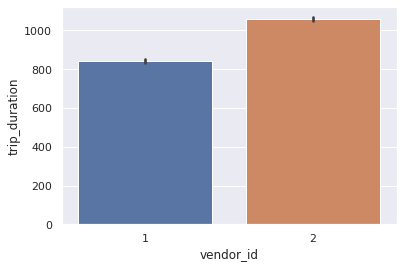

In [ ]:
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)

Vendor id 2 takes longer trips as compared to vendor 1

##Trip Duration per Store and Forward Flag

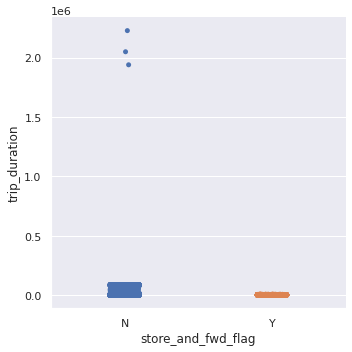

In [ ]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind="strip")

Trip duration is generally longer for trips whose flag was not stored.

##Trip Duration per passenger count

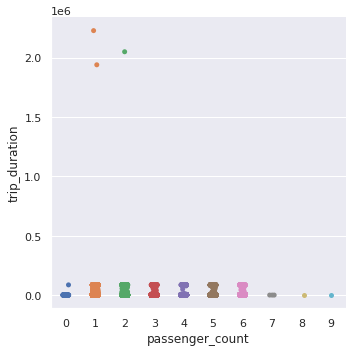

In [ ]:
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip')

There is no visible relation between trip duration and passenger count.


##Trip Duration per hour

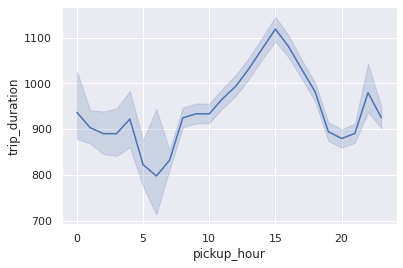

In [ ]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy.

##Trip Duration per time of day

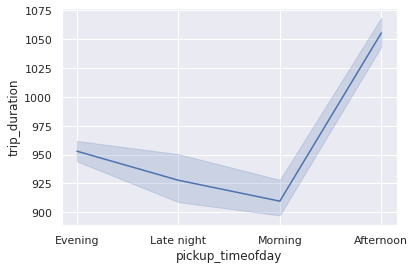

In [ ]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=df)

Trip duration is the maximum in the afternoon and lowest between late night and morning.

##Trip Duration per Day of Week

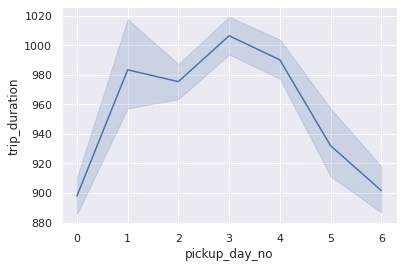

In [ ]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=df)

Trip duration is the longest on Mondays closely followed by Fridays.

##Trip Duration per month

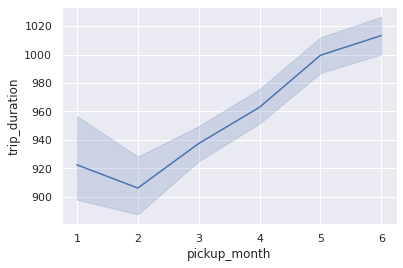

In [ ]:
sns.lineplot(x='pickup_month',y='trip_duration',data=df)

From February, we can see trip duration rising every month.

##Distance and Vendor

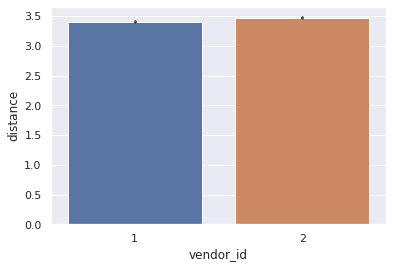

In [ ]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

The distribution for both vendors is very similar

##Distance and Store and Forward Flag

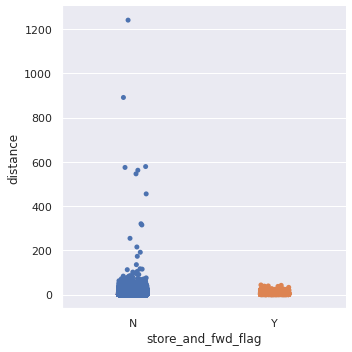

In [ ]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind='strip')

for longer distances the trip is not stored

##Distance per passenger count

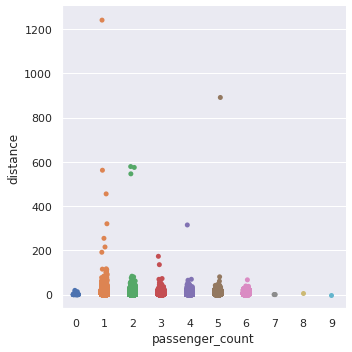

In [ ]:
sns.catplot(y='distance',x='passenger_count',data=df,kind='strip')

some of the longer distances are covered by either 1 or 2 or 4 or 5 passenger rides.

##Distance per day of week

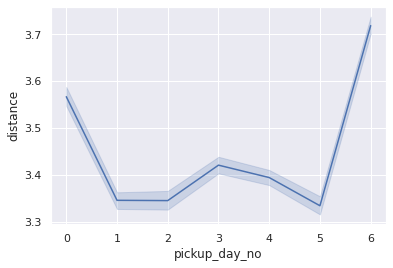

In [ ]:
sns.lineplot(x='pickup_day_no',y='distance',data=df)



1.   Distances are longer on Sundays probably because it’s weekend.

2. Monday trip distances are also quite high.

3.  This probably means that there can be outstation trips on these days and/or the streets are busier.


##Distance per hour of day

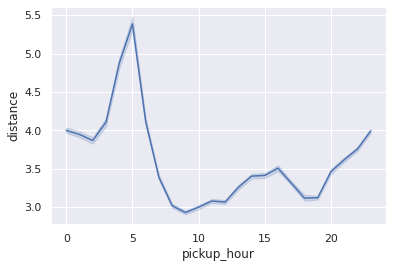

In [ ]:
sns.lineplot(x='pickup_hour',y='distance',data=df)

Distances are the longest around 5 am.

##Distance per time of day

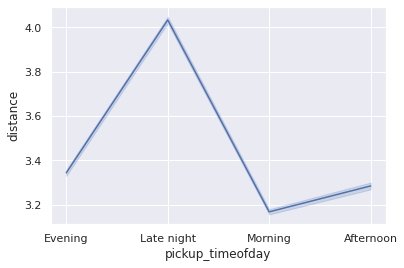

In [ ]:
sns.lineplot(x='pickup_timeofday',y='distance',data=df)

distances being the longest during late night or it maybe called as early morning too.
This can probably point to outstation trips where people start early for the day

##Distance per month

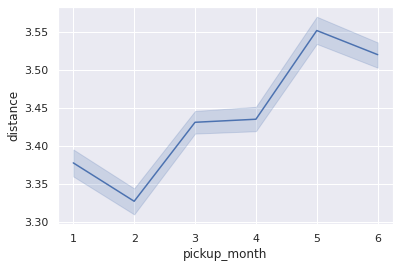

In [ ]:
sns.lineplot(x='pickup_month',y='distance',data=df)

also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June

##Passenger Count and Vendor id

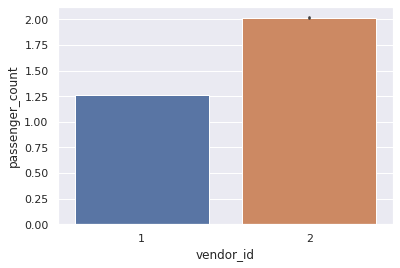

In [ ]:
sns.barplot(y='passenger_count',x='vendor_id',data=df)

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides

##Trip Duration and Distance

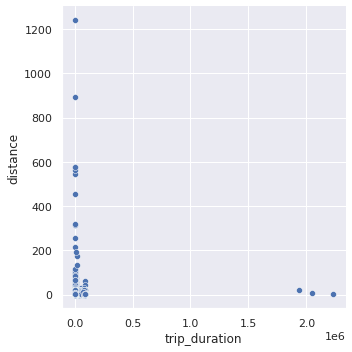

In [ ]:
sns.relplot(y=data.distance,x='trip_duration',data=df)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

5897 with 0 distence


In [ ]:
df[df.distance==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,...,Monday,0,0,18,18,2,2,Evening,Evening,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,...,Tuesday,1,1,18,18,5,5,Evening,Evening,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,...,Monday,0,0,23,23,5,5,Late night,Late night,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,...,Monday,0,0,19,19,1,1,Evening,Evening,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,...,Wednesday,2,2,22,22,1,1,Late night,Late night,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456399,id0618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.978859,40.756721,-73.978859,40.756721,N,...,Wednesday,2,2,8,9,2,2,Morning,Morning,0.0
1456627,id1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.963554,40.768517,-73.963554,40.768517,N,...,Saturday,5,5,22,22,2,2,Late night,Late night,0.0
1456989,id2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.984848,40.728222,-73.984848,40.728222,N,...,Saturday,5,5,7,7,3,3,Morning,Morning,0.0
1457114,id0051314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.965981,40.770988,-73.965981,40.770988,N,...,Saturday,5,5,20,20,4,4,Evening,Evening,0.0


even though distance is recorded as 0 but trip duration is definitely more.

One reason can be that the dropoff coordinates weren’t recorded.

Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.
 

 

So, we see how Exploratory Data Analysis helps us identify underlying patterns in the data, let us draw out conclusions and this even serves as the basis of feature engineering before we start building our model.

In [ ]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
df['vendor_id'] = enc.fit_transform(df['vendor_id'])




Text(0.5, 1.0, 'Correlation Plot')

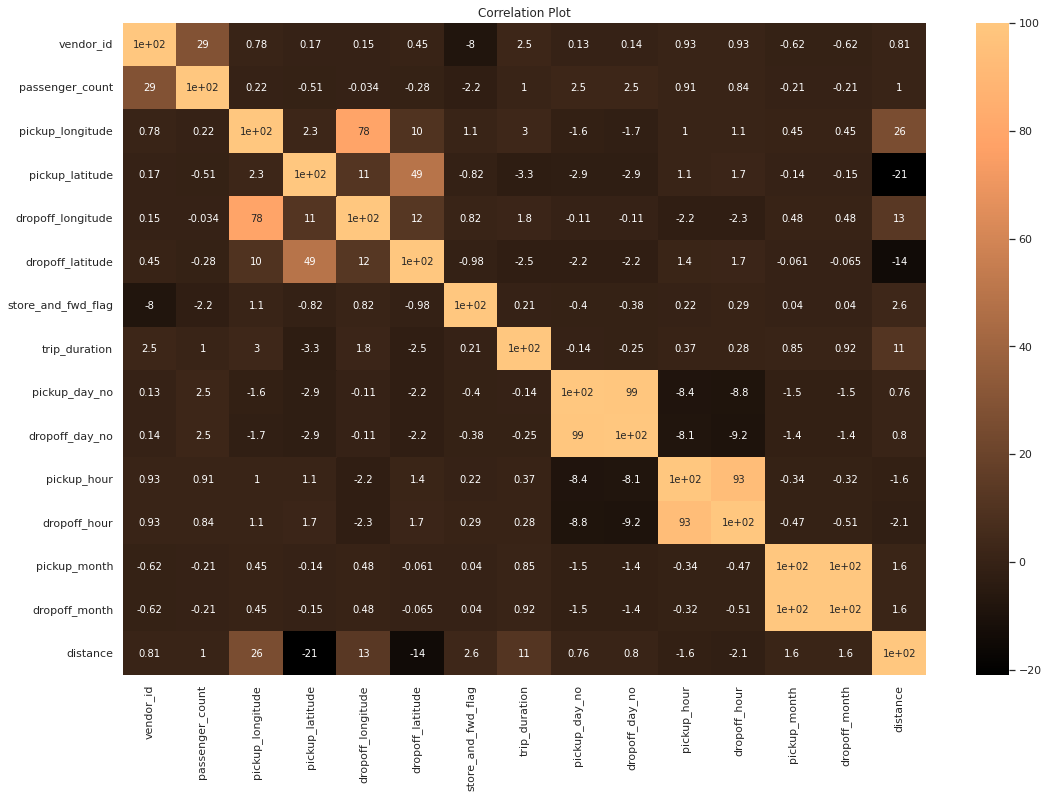

In [ ]:
#Plotting Pearson Correlation heatmap

plt.figure(figsize=(18,12))
sns.heatmap(df.corr()*100, annot=True, cmap='copper')
plt.title('Correlation Plot')

* * Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded as * hose are Categorical features , binarizing them will help us to compute them with ease.
* * We can convert these features into “category” type by function called “astype(‘category’)” that will speed up the Computation. Since, my plan is to go with PCA for dimension reduction, I’m not going with that approach.

##Principal Component Analysis (PCA)
* Now that we’re done, we have to pass our Scaled Dataframe in PCA model and observe the elbow plot to get better idea of explained variance.
* We'll also go through a approach without using PCA in Second Part and Later compare results with PCA approach.


In [ ]:
nyc_taxi_df = df.drop(['id','pickup_datetime','pickup_day','pickup_timeofday','dropoff_timeofday','dropoff_datetime','dropoff_day','distance'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,0,17,17,3,3
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,0,0,6,6
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,11,12,1,1
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,2,19,19,4,4
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,5,13,13,3,3


##Normalization


In [ ]:
#Predictors and Target Variable

X = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration'])

In [ ]:
# Normalising Predictors and creating new dataframe....................

from sklearn.preprocessing import StandardScaler
cols = X.columns
print(cols)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [ ]:
new_df = scaler.fit_transform(X)
new_df.shape

(1458643, 13)

In [ ]:
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,0.932379,-0.505637,-0.122260,0.517493,0.124369,0.384575,-0.074471,-1.561061,-1.561087,0.530264,0.524563,-0.307440,-0.307622
1,-1.072525,-0.505637,-0.097726,-0.375822,-0.368970,-0.575303,-0.074471,1.509503,1.505459,-2.126115,-2.097404,1.477172,1.476800
2,0.932379,-0.505637,-0.078141,0.395909,-0.451805,-1.162219,-0.074471,-1.049300,-1.049996,-0.407282,-0.246604,-1.497182,-1.497236
3,0.932379,-0.505637,-0.515557,-0.941279,-0.549976,-1.256071,-0.074471,-0.537540,-0.538905,0.842779,0.833030,0.287430,0.287186
4,0.932379,-0.505637,0.006113,1.286092,0.006974,0.855957,-0.074471,0.997742,0.994368,-0.094767,-0.092370,-0.307440,-0.307622


Normalizing the Dataset using Standard Scaling Technique.

Now, Why Standard Scaling ? Why not MinMax or Normalizer ?

It is because MinMax adjusts the value between 0’s and 1’s , which tend to work better for optimization techniques like Gradient descent and machine learning algorithms like KNN.

While, Normalizer uses distance measurement like Euclidean or Manhattan, so Normalizer tend to work better with KNN.

##Principal Component Analysis (PCA)
Now that we’re done, we have to pass our Scaled Dataframe in PCA model and observe the elbow plot to get better idea of explained variance.

We'll also go through a approach without using PCA in Second Part and Later compare results with PCA approach.

In [ ]:
X = new_df

In [ ]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyc_taxi_df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([1.65294057e-01, 1.53967400e-01, 1.44188649e-01, 1.37078340e-01,
       1.08244919e-01, 1.00190517e-01, 7.59891265e-02, 5.43200150e-02,
       3.90876441e-02, 1.60810445e-02, 5.09285806e-03, 4.60661722e-04,
       4.76808466e-06])

<BarContainer object of 13 artists>

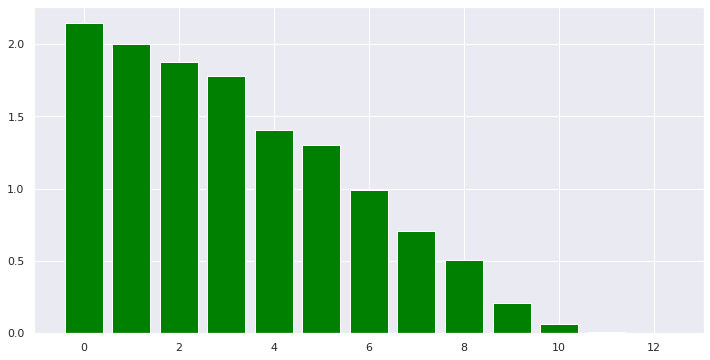

In [ ]:
#Variance Ratio vs PC plot

plt.figure(figsize=(12,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="green")

At 10th component our PCA model seems to go Flat without explaining much of a Variance.

Text(0.5, 1.0, 'Elbow Plot')

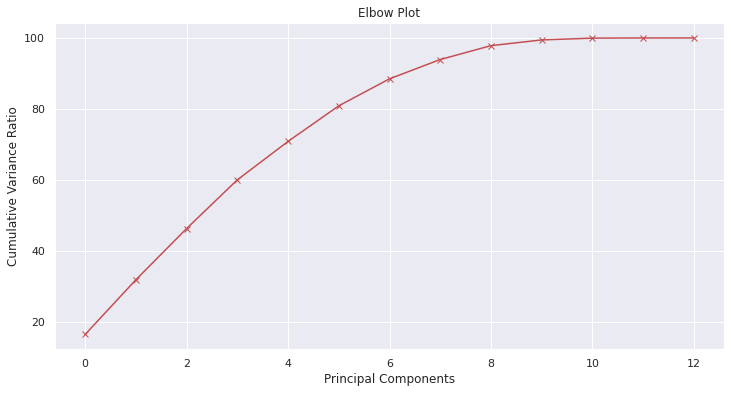

In [ ]:
#Cumulative Variance Ratio

plt.figure(figsize=(12,6))
plt.plot(np.cumsum(var_rat)*100, color="r", marker='x')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

In [ ]:
#Applying PCA as per required components

pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([2.14882422, 2.00157758, 1.87445372, 1.78201964, 1.40718491,
       1.30247761, 0.98785932, 0.70616068, 0.50813972, 0.20905372,
       0.0662072 , 0.00598861])

Above , we had considered 12 as a required number of components and extracted new features by transforming the Data.


Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

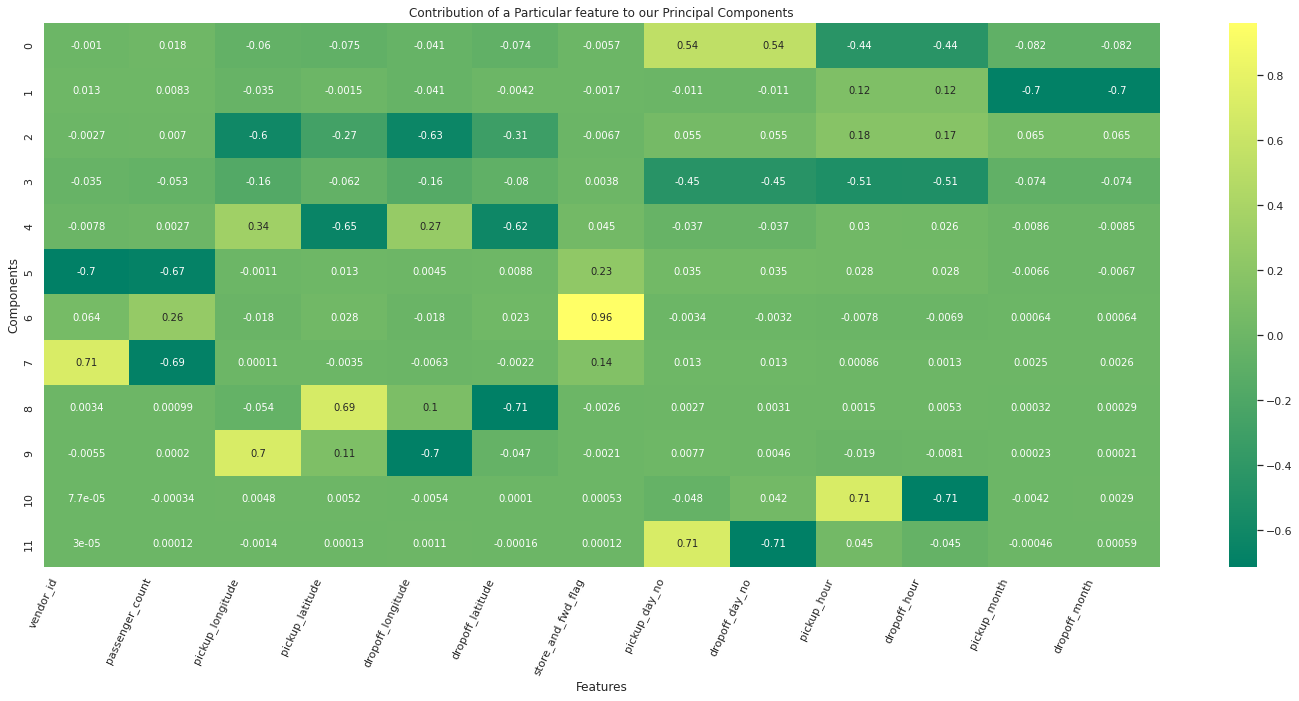

In [ ]:
#importance of features in Particular Principal Component

plt.figure(figsize=(25,10))
sns.heatmap(pca.components_, annot=True, cmap="summer")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

Above plot gives us detailed idealogy of which feature has contributed more or less to our each Principal Component.

Pricipal Components are our new features which consists of Information from every other original Feature we have.

We reduce the Dimensions using PCA by retaining as much as Information possible.

##Splitting Data and Choosing Algorithms

 I want to approach from base model built using basic Linear Regression and then bring in more Sophisticated Algorithms - Decision Tree & Random Forest. It will give us good idea how Linear Regression performs against Decision Tree Regressor and Random Forest Regressor. 

In [ ]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(nyc_taxi_df['trip_duration']).values

In [ ]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021050, 12), (437593, 12), (1021050,), (437593,))

###Linear regression:
Simple to explain.

Model training and prediction are fast.

No tuning is required except regularization.

In [ ]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.38519164, 6.42047237, 6.60022182, ..., 6.39001778, 6.51414782,
       6.42947462])

In [ ]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(6.464214658814536,
 array([-0.02179538, -0.02315552,  0.00288525, -0.01334423,  0.12948919,
        -0.01726024,  0.00897227,  0.00237954, -0.01332672,  0.05637943,
        -0.01110976, -0.12737403]))

Interpreting the coefficients:

Here we can see Increase and decrease order at each principal component in trip duration.

In [ ]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.043578008268104096
Validation Score :  0.04474664319033839
Cross Validation Score :  -0.05022883757274521
R2_Score :  -22.339756975006562


Text(0.5, 1.0, 'Test VS Prediction')

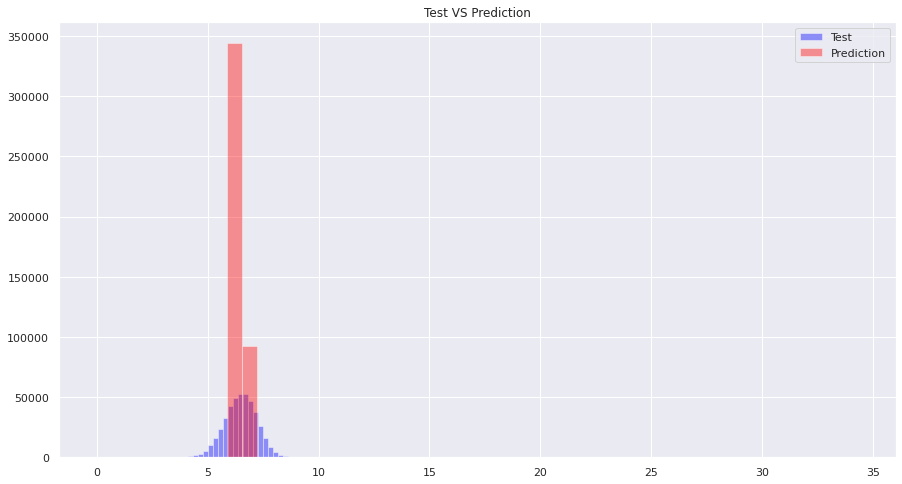

In [ ]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="blue", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="red", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Visualization . we can clearly identify that the Linear Regression isn't performing good. The Actual Data(in Blue) and Predicted values (in Red) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

###Decision Tree:
Decision trees are very intuitive and easy to explain.

They follow the same pattern of thinking that humans use when making decisions.

Decision trees are a common-sense technique to find the best solutions to problems with uncertainty.

In [ ]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([5.529441  , 7.14547766, 6.30546508, ..., 5.79506483, 6.53925262,
       7.19852855])

In [ ]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.657270631167965
Validation Score :  0.6521714362546001
Cross Validation Score :  0.6494991868656634
R2_Score :  0.47146598959493546
RMSE :  0.07364758295713479


Text(0.5, 1.0, 'Test VS Prediction')

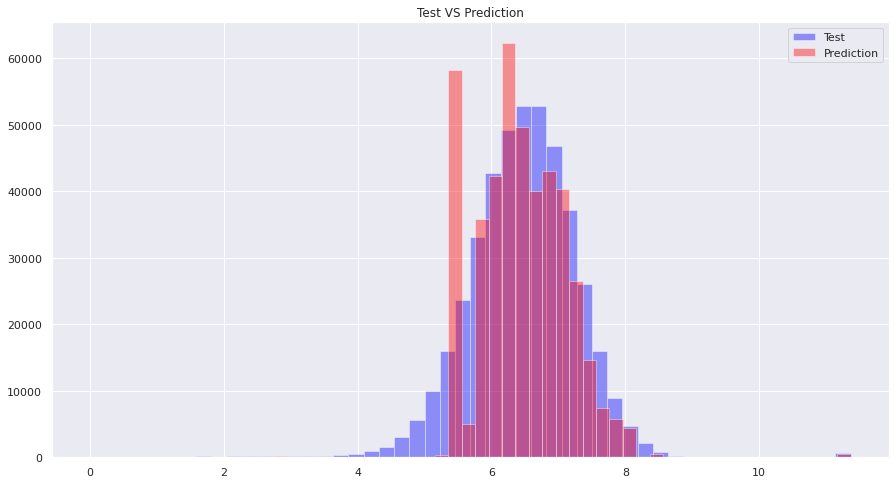

In [ ]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="blue", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="red", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Visualization. we can clearly identify that the Decision Tree Algorithm is performing good. The Actual Data (in Blue) and Predicted values (in Red) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction.

###Random Forest:
It is one of the most accurate learning algorithms available.

Random Forest consisits of multiple Decision Tress - Results from multiple trees are then merged to give best possible final outcome.

Random forests overcome several problems with decision trees like Reduction in overfitting.

Now, Let us also try Random Forest on our Data and see what do we get.

In [ ]:
#Random forest implementation

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([5.64840166, 7.15650271, 6.32149253, ..., 5.81467046, 6.48932919,
       7.21232614])

In [ ]:
#examining metrics 

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.6660401377447147
Validation Score :  0.661426718544595
Cross Validation Score :  0.6609561882181215
R2_Score :  0.4750190098885688
RMSE :  0.07286448852967582


Text(0.5, 1.0, 'Test VS Prediction')

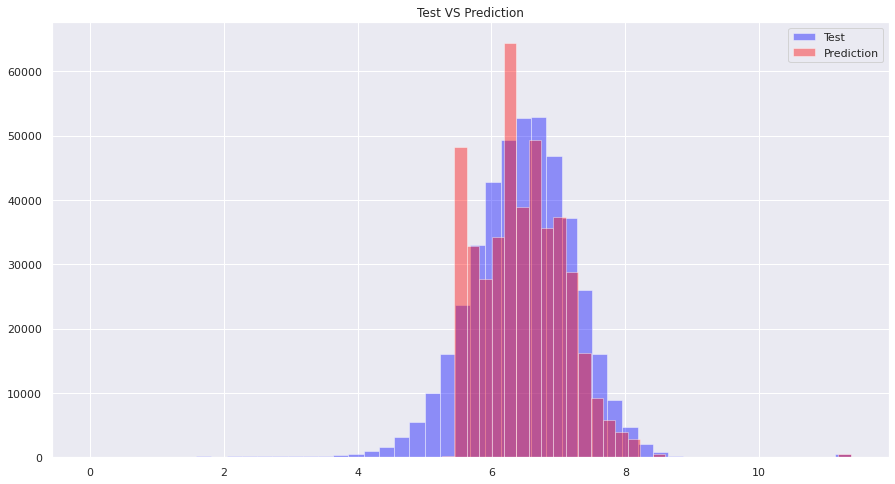

In [ ]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="blue", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="red", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Viz. we can clearly identify that the Random Forest Algorithm is also performing good. The Actual Data (in Blue ) and Predicted values (in Red) are as close as possible. We can conclude that Random Forest could be a good choice for Trip duration prediction.

Similarly, we can Hyper tune Random Forest to get the most out of it.

###R2 Scores Evaluation
R2 Score or R-Squared is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x504 with 0 Axes>

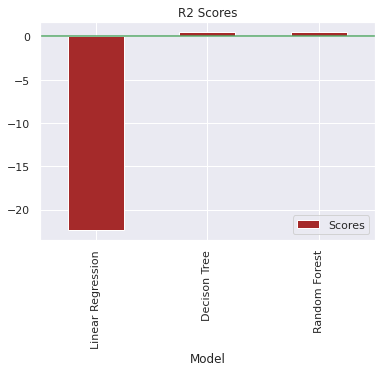

In [ ]:
#r2 score plot for all 3 models

plt.figure(figsize=(10,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")


Although , our Evaluation Metric isn't R2 Score but I'm just plotting them to check the Good Fit.
We're getting good fit score for Decision Tree and Random Forest , i.e, close to 1.0

###RMSE Evaluation
RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
With RMSE we explicitly know how much our predictions deviate.
Lower values of RMSE indicate better fit with lesser LOSS.

Text(0.5, 1.0, 'RMSE - Lesser is Better')

<Figure size 720x720 with 0 Axes>

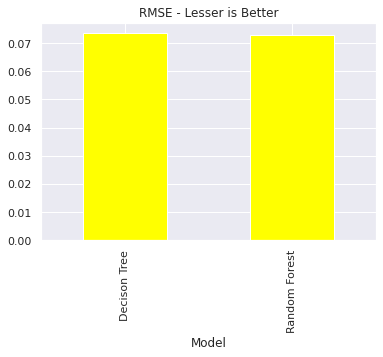

In [ ]:
#RMSE plot

plt.figure(figsize=(10,10))
r2 = pd.DataFrame({'RMSE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="yellow", legend=False)
plt.title("RMSE - Lesser is Better")

We can observe from above Viz. that our Decision Tree model and Random Forest model are good performers. As, Random Forest is providing us reduced RMSE, we can say that it's a model to Opt for.

##Now start Without PCA

Another approach we could go with is without PCA, just Standard Scaling Dataset and applying our Algorithms.

The approach can give us better idea of what works better for us.

This approach might take great amount of computational resources and time, it will be good if we can run this on Google’s Collaboratory, that will eliminate huge computational stress on our system as the program will be running on Cloud.

In [ ]:
X = new_df
y = np.log(nyc_taxi_df['trip_duration']).values

###Linear Regression

In [ ]:
#train test split

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021050, 13), (437593, 13), (1021050,), (437593,))

In [ ]:
#implenting linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.38506082, 6.42037793, 6.59956113, ..., 6.38933041, 6.51507376,
       6.43044768])

In [ ]:
#Intercept & Coef

est_lr.intercept_, est_lr.coef_

(6.464212377180989,
 array([ 0.01307223,  0.01286989,  0.08613793, -0.08549946, -0.00438123,
        -0.07145594,  0.01073251, -0.09926828,  0.07840199, -0.00655323,
         0.03933106, -1.82125526,  1.85744902]))

In [ ]:
#Examining metrics

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.04423750751308786
Validation Score :  0.04559047262175586
Cross Validation Score :  -0.049330540712902084
R2_Score :  -21.95397102743227


Text(0.5, 1.0, 'Test VS Prediction')

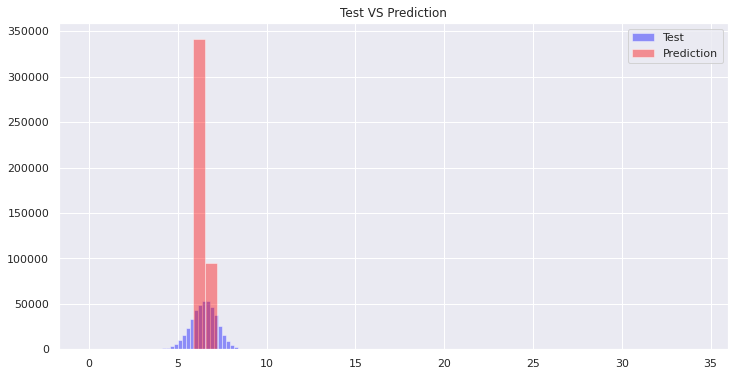

In [ ]:
#prediction vs validation data

plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="blue", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="red", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Observations shows us that Linear Regression isn't performing well even.

###Decision Tree

In [ ]:
#Decision tree implementation

from sklearn.tree import DecisionTreeRegressor


est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([6.11973586, 7.19536685, 6.45667946, ..., 5.92855997, 6.15414396,
       7.19536685])

In [ ]:
#Examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.4652454017493527
Validation Score :  0.45978612336808944
Cross Validation Score :  0.45734203404899415
R2_Score :  -0.15848316667040097
RMSE :  0.08790501236172776


Text(0.5, 1.0, 'Test VS Prediction')

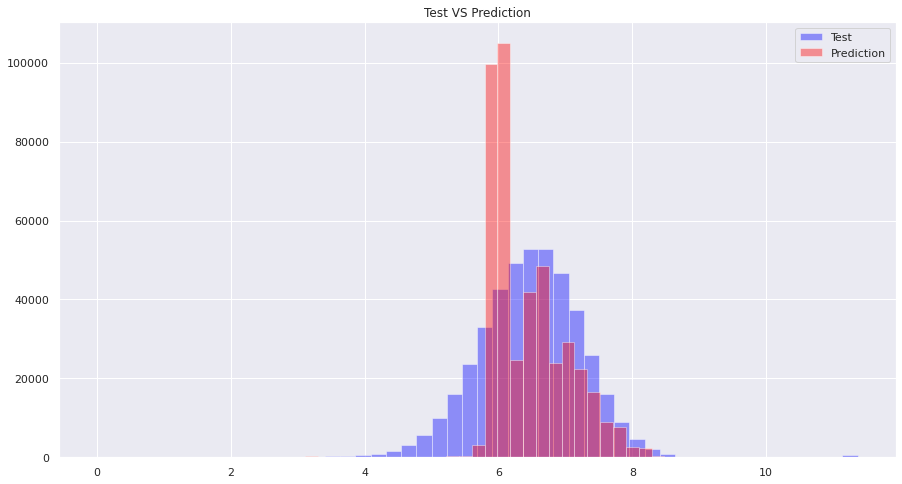

In [ ]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="blue", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="red", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

This model gave us loss of 0.0878, we can say it is good but not the acceptable, knowing the fact that we got RMSE of 0.0878 in previous approach where we applied PCA.

###Random Forest

In [ ]:
#implementation of forest algorithm

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred


array([6.12442264, 7.20897913, 6.17716181, ..., 5.93101601, 6.15319991,
       7.20897913])

In [ ]:
#examining metrics

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.4754962269208399
Validation Score :  0.4704404904516031
Cross Validation Score :  0.4711527341755879
R2_Score :  -0.17607802743201395
RMSE :  0.08715196679257288


Text(0.5, 1.0, 'Test VS Prediction')

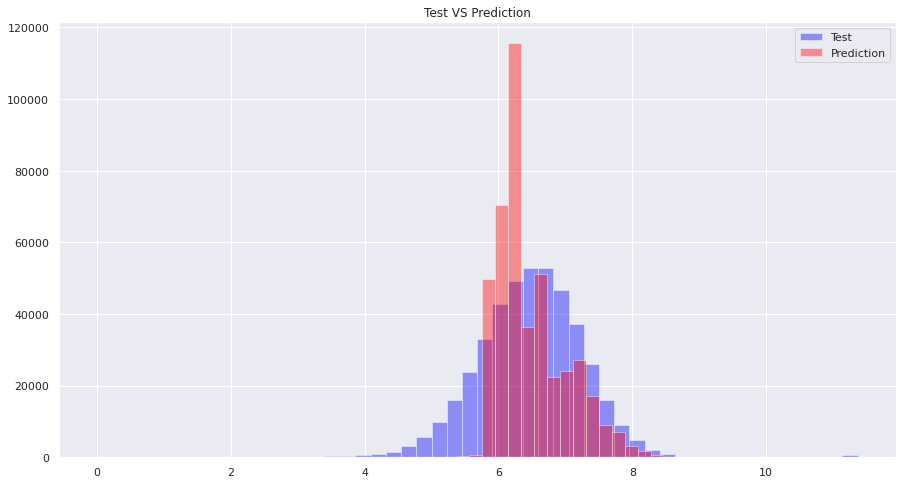

In [ ]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="blue", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="red", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Again the loss value we got here is 0.0872 is good when tried to match with 

1.   List item
2.   List item

Decision Tree's RMSE ,i.e, 0.0872.

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x576 with 0 Axes>

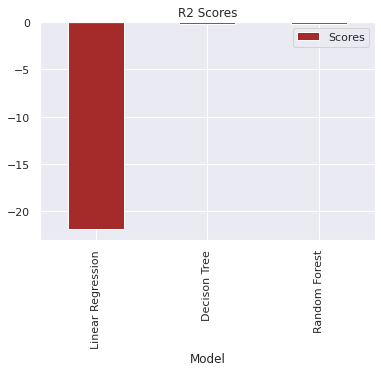

In [ ]:
#r2 score plot for all 3 models

plt.figure(figsize=(10,8))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

Text(0.5, 1.0, 'RMSE - Lesser is Better')

<Figure size 720x720 with 0 Axes>

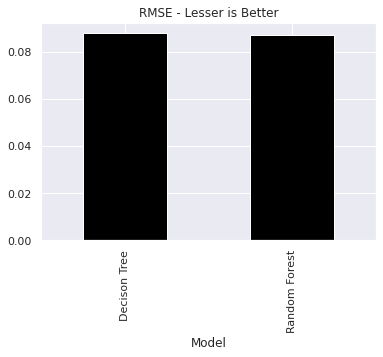

In [ ]:
#RMSE plot

plt.figure(figsize=(10,10))
r2 = pd.DataFrame({'RMSE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="black", legend=False)
plt.title("RMSE - Lesser is Better")

Here Decision Tree with random forest loking similar.

##Conclustion and Insights


The problem that commonly emerges with Decision Tree, is that it can overfit.

A 'random forest' is a group of prediction trees used for classification or regression.

A decision tree model can consider all the features which makes it memorize everything. Even on unseen data, it could get overfitted on the training data that were used when making it.

A random forest will randomly select a small number of rows to either interpret or ignore the results of the Tress altogether. It will then take the results from all these trees and combine them together to get a better, more stable result

Taxi service providers in New York City are observed according to which provider has the highest number of repeat customers

Found few trips which lasted between 528 hours and 972 hours, potentially outliers.

The passenger count analysis revealed that very few trips had no passengers and there was one trip with 7, 8 and 9 passengers.

Monthly trip analysis showed that March and April were the busiest months with 1697 trips in total, while January had only 341 trips. This gap in travel could be due to snow causing low occupancy during the first month of the year.

###Recommended Approach:
Apply Standard Scaling on the Dataset to Normalize the values.
Further, Apply PCA to reduce dimensions, as you’ll extract features from our primary DateTime Feature. Those additional features might lead our model to suffer from “Curse of dimensionality” and could drastically affect performance.
Pass the PCA Transformed data in our ML Regression Algorithms and Evaluate results.
###Also can try this Approach
Also when we can use IQR finding and removing outlier technique and then apply hyperparameter technique it will give us best result.
We can perform hyper tuning on our Algorithm to get the most out of it but Hyper Tuning consume lot of time and resources of the system depending upon the how big the Data we have and what algorithm we're using. It will go through number of Iterations and try to come up with the best possible value for us.